In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/museum_train.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [27]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

In [2]:
indoor_train_path = '/content/museum_train/indoor'
outdoor_train_path = '/content/museum_train/outdoor'

In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((64, 64))  # Resize images to a common size
        img = img.convert('L')  # Convert to grayscale (optional)
        img = np.array(img).flatten()  # Flatten the image to 1D array
        img = img/255
        images.append(img)
        labels.append(label)
    return images, labels

In [4]:
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [5]:
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model_1 = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=10,
                                   verbose=1,
                                   random_state=42,)
model_1.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3826            1.07m
         2           1.3789           55.76s
         3           1.3755           48.78s
         4           1.3724           41.71s
         5           1.3689           34.70s
         6           1.3659           27.77s
         7           1.3628           20.76s
         8           1.3599           13.90s
         9           1.3570            6.94s
        10           1.3537            0.00s


GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42,
                           verbose=1)

Accuracy: 65.85%
Precision: 61.89%
Recall: 80.36%
F1 Score: 69.93%


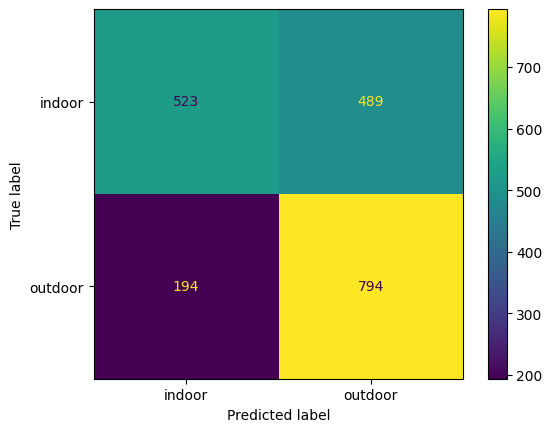

In [8]:
y_pred = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [9]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((64, 64))
    img = img.convert('L')
    img = np.array(img).flatten()
    img = img/255
    return img

In [10]:
my_img = load_single_images('/content/test_image_1.jpg')

In [11]:
model_1.predict(my_img.reshape(1,-1))

array([0])

In [16]:
model_2 = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=100,
                                   verbose=1,
                                   random_state=42,
                                   max_features='sqrt')
model_2.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3831           15.39s
         2           1.3801           17.18s
         3           1.3771           16.26s
         4           1.3741           15.44s
         5           1.3711           14.93s
         6           1.3682           14.53s
         7           1.3654           14.24s
         8           1.3624           14.07s
         9           1.3594           13.81s
        10           1.3564           13.21s
        20           1.3298           10.04s
        30           1.3070            9.12s
        40           1.2873            8.02s
        50           1.2694            6.58s
        60           1.2531            5.07s
        70           1.2381            3.70s
        80           1.2230            2.42s
        90           1.2093            1.22s
       100           1.1957            0.00s


GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           random_state=42, verbose=1)

Accuracy: 68.30%
Precision: 64.95%
Recall: 77.83%
F1 Score: 70.81%


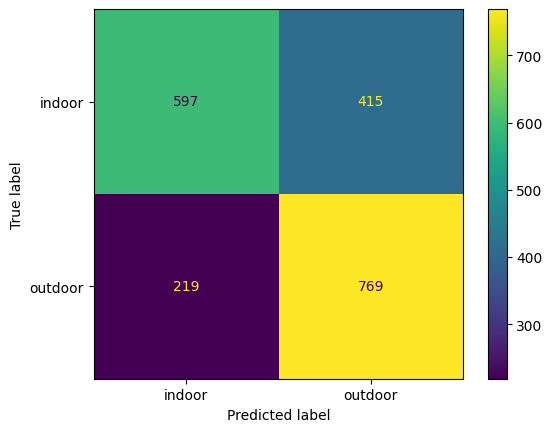

In [19]:
y_pred = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [20]:
model_2.predict(my_img.reshape(1,-1))

array([0])

In [25]:
model_3 = GradientBoostingClassifier(learning_rate=0.001,
                                   n_estimators=500,
                                   verbose=1,
                                   random_state=42,
                                   max_features='sqrt',
                                   max_depth=10,
                                   subsample=0.5)
model_3.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3848           0.0006            1.86m
         2           1.3840           0.0011            1.92m
         3           1.3829           0.0009            1.93m
         4           1.3820           0.0010            1.97m
         5           1.3810           0.0009            1.97m
         6           1.3801           0.0009            1.97m
         7           1.3789           0.0008            1.99m
         8           1.3781           0.0010            1.98m
         9           1.3772           0.0012            2.08m
        10           1.3761           0.0007            2.15m
        20           1.3674           0.0012            2.33m
        30           1.3581           0.0011            2.15m
        40           1.3488           0.0006            2.04m
        50           1.3401           0.0010            2.02m
        60           1.3309           0.0004            2.37m
       

GradientBoostingClassifier(learning_rate=0.001, max_depth=10,
                           max_features='sqrt', n_estimators=500,
                           random_state=42, subsample=0.5, verbose=1)

Accuracy: 75.95%
Precision: 75.17%
Recall: 76.62%
F1 Score: 75.89%


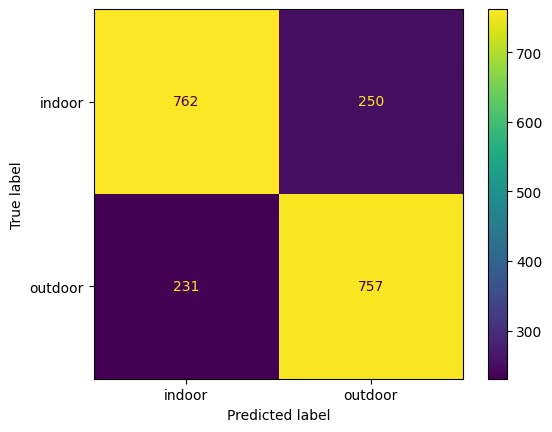

In [28]:
y_pred = model_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [29]:
model_3.predict(my_img.reshape(1,-1))

array([0])